# **Big Data Analysis Merito University (2024/2025): Comment Cleanup Script**

## **Project Source:** [View the GitHub Repository](https://github.com/Alendart/ufo_project)
**Project Contributors:**  
Pawel Baraniak [View the GitHub Repository](https://github.com/alendart)  
Ewa Jurek [View the GitHub Repository](https://github.com/ewajurek)  
Krzysztof Kiervowski[View the GitHub Repository](https://github.com/kiekrz)  
Wojciech Liszkowski [View the GitHub Repository](https://github.com/Woicieszeq)  
Wojciech Rosciszewski [View the GitHub Repository](https://github.com/wojtekowski) 

**Date**: 19.12.2024

---

## **Table of Contents**
1. [Introduction](#Introduction)
2. [Objective](#Objective)
3. [Libraries and Tools](#Libraries-and-Tools)
4. [Workflow](#Workflow)

---

## **Introduction**  
Unidentified Flying Objects (UFOs) have long captivated the curiosity of people worldwide, sparking debates, investigations, and theories. This project divers deper into a century's worth of global UFO observation data, offering a unique opportunity to explore patterns, trends, and potential correlations within these phenomena. By leveraging data analytics and visualization tools, we aim to uncover meaningful insights from over 80,000 reported UFO sightings across various regions and time periods.

---

## **Objective**
The primary goal of this project is to analyze a comprehensive dataset of UFO sightings to uncover geographic, temporal, and descriptive trends. Specifically, the objectives include:

Identifying geographic clusters of UFO sightings and determining which regions have the highest concentration of reports.
Analyzing temporal trends to discover patterns in UFO sightings over time, including seasonal fluctuations and notable spikes.
Investigating potential correlations between UFO sightings and proximity to geographic features such as airports, military bases, or research facilities.
(Optional) Examining descriptions of UFO sightings to identify common features such as shape, color, or duration, and exploring how these descriptors have evolved over time.
The findings will be presented through interactive visualizations using tools such as Power BI, QlikView, or Tableau.

---



In [1]:
# Import necessary libraries

# Data manipulation and analysis
import pandas as pd
# String operations
import string
# Natural Language Processing (NLP) libraries
import nltk
from nltk.tokenize import word_tokenize
from textblob import TextBlob
import spacy
# Data visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
# Machine learning libraries
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.cluster import KMeans
# Utility libraries
from collections import Counter


# Load the CSV file
df = pd.read_csv('comments.csv')

# Display first few rows
print(df.head())


# Extract the comments
comments = df['comments'].dropna()
#If you do not have nltk installed, uncommend the below and rerun the imports.
#nltk.download('punkt')


                                            comments
0  This event took place in early fall around 194...
1  1949 Lackland AFB&#44 TX.  Lights racing acros...
2  Green/Orange circular disc over Chester&#44 En...
3  My older brother and twin sister were leaving ...
4  AS a Marine 1st Lt. flying an FJ4B fighter/att...


## Topic Modeling Approach

Topic modeling is a machine learning technique employed in Natural Language Processing (NLP) to uncover hidden themes within large collections of text documents. By identifying abstract "topics" present across documents, it facilitates the summarization, organization, and comprehensive understanding of extensive textual data. For purpose of this project we will use the LDA technique, below a short introduction.

- **Latent Dirichlet Allocation (LDA)**: One of the most widely used methods for topic modeling.
  - **Assumptions**:
    - Each document is a combination of a limited number of topics.
    - Each word in a document is linked to one of these topics.
  - **Benefits**:
    - Reveals the underlying thematic structure.
    - Aids in data analysis and content categorization.


In [17]:
# Topic Modeling
vectorizer = CountVectorizer(max_df=0.9, min_df=2, stop_words='english')
comments_vectorized = vectorizer.fit_transform(comments)
lda = LatentDirichletAllocation(n_components=5, random_state=0)
lda.fit(comments_vectorized)

# Display the topics
for idx, topic in enumerate(lda.components_):
    print(f'Topic {idx}:')
    print([vectorizer.get_feature_names_out()[i] for i in topic.argsort()[:-11:-1]])


Topic 0:
['light', 'bright', 'lights', 'white', 'sky', 'moving', 'red', 'object', 'note', 'nuforc']
Topic 1:
['lights', 'orange', 'seen', 'formation', 'north', 'south', 'ufo', 'east', 'west', 'light']
Topic 2:
['saw', 'like', 'looked', 'just', 'sky', 'driving', 'looking', 'went', 'light', 'noticed']
Topic 3:
['object', 'shaped', 'craft', 'high', 'flying', 'speed', 'seen', 'ufo', 'lights', 'black']
Topic 4:
['sky', 'object', 'night', 'light', 'lights', 'bright', 'orange', 'glowing', 'strange', 'line']


[('light', 17156), ('lights', 17054), ('sky', 15719), ('object', 14358), ('over', 14069), ('bright', 12939), ('it', 10974), ('moving', 8941), ('white', 7185), ('orange', 7155), ('red', 6449), ('shaped', 5916), ('ufo', 5080), ('craft', 5035), ('flying', 4869), ('two', 4564), ('objects', 4041), ('large', 3897), ('night', 3832), ('out', 3764)]


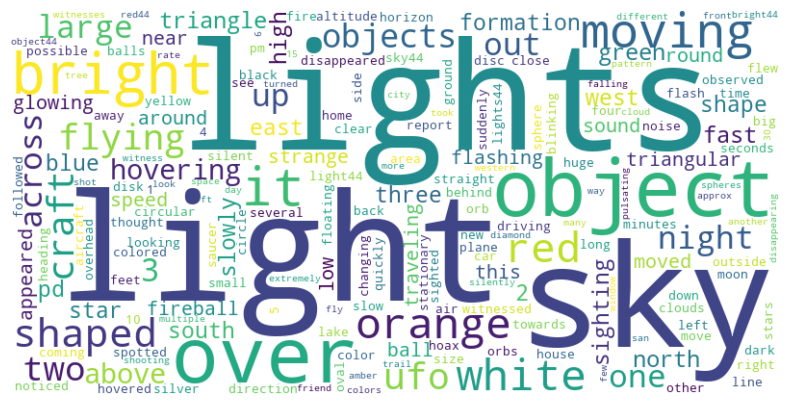

In [18]:
# Preprocess the text data
def clean_text(text):
    stopwords = {'our', 'us', 'each', 'same', 'after', 'into', 'ca', 'could', 'nuforc', 'went', 'there', 'while', 'am', 'yes', 'no', 'which', 
                 'i', 'from', 'than', 'is', 'on', 'what', 'be', 'or', 'made', 'by', 'so', 'for', 'before', 'was', 'but', 'when', 'note', 'came',
                 'we', 'me', 'all', 'have', 'and', 'in', 'a', 'of', 'the', 'with', 'as', 'my', 'like', 'that', 'at', 'had', 'not', 'were', 'about', 
                 'going', 'just', 'to', 'very', 'they', 'then', 'an', 'when', 'amp', 'w', '44', '20', 'through', 'looked', 'seen', 'saw',
                'cigar', 'something', 'thid', 'seemed', 'changed', 'chainging', 'during', 'first', 'off', 'some'}
    text = text.lower()
    text = ''.join([char for char in text if char not in string.punctuation])
    words = text.split()
    words = [word for word in words if word not in stopwords]
    return ' '.join(words)

comments = comments.apply(clean_text)

# Tokenize and count word frequencies
tokens = [word_tokenize(comment) for comment in comments]
all_tokens = [token for sublist in tokens for token in sublist]
word_freq = Counter(all_tokens)

# Display most common words
print(word_freq.most_common(20))

# Visualize word frequencies
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_freq)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

# Introduction to Sentiment Analysis

Sentiment Analysis is a technique in Natural Language Processing (NLP) used to determine the emotional tone behind a body of text. It helps categorize opinions expressed in text into positive, negative, or neutral sentiments. The key components of Sentiment Analysis include:

- **Text Preprocessing**: Cleaning and preparing text data by removing noise and performing tokenization.
- **Feature Extraction**: Transforming text data into numerical format using methods like Bag of Words (BoW), TF-IDF, or word embeddings.
- **Classification**: Using algorithms such as Logistic Regression, Naive Bayes, SVM, and deep learning models to classify the sentiment.
- **Evaluation**: Assessing model performance with metrics like accuracy, precision, recall, and F1 score.

Applications of Sentiment Analysis span across various domains including social media monitoring, customer feedback analysis, market research, and political analysis. By analyzing sentiments, valuable insights into public opinion can be gained, aiding in data-driven decision-making. 


                                            comments sentiment
0  This event took place in early fall around 194...  Positive
1  1949 Lackland AFB&#44 TX.  Lights racing acros...  Positive
2  Green/Orange circular disc over Chester&#44 En...  Positive
3  My older brother and twin sister were leaving ...  Positive
4  AS a Marine 1st Lt. flying an FJ4B fighter/att...  Positive


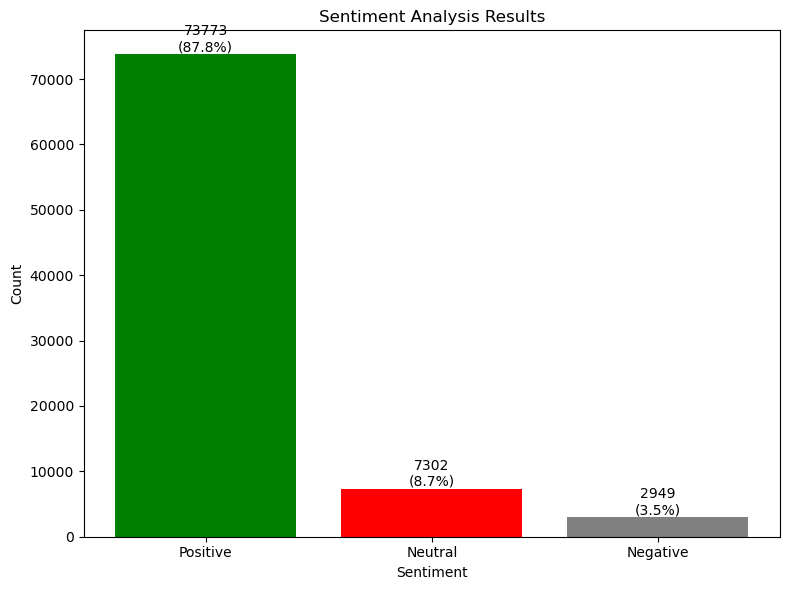

In [21]:
# Sentiment Analysis with Custom Rules
def get_sentiment(comment):
    # Define keywords indicating positive sentiment for UFO sightings
    positive_keywords = {'ufo', 'sighting', 'alien', 'lights', 'blinking', 'disappeared', 'object', 'orange', 'white', 'red', 'light', 'green', 'circle', 
                        'overhead', 'hovering', 'flying', 'sound', 'flashing', 'moving', 'bright', 'white', 'glowing'}

    # Check for keywords in the comment
    if any(keyword in comment.lower() for keyword in positive_keywords):
        return 'Positive'

    # Fallback to TextBlob sentiment analysis
    analysis = TextBlob(comment)
    if analysis.sentiment.polarity > 0:
        return 'Positive'
    elif analysis.sentiment.polarity < 0:
        return 'Negative'
    else:
        return 'Neutral'

df['sentiment'] = comments.apply(get_sentiment)
print(df[['comments', 'sentiment']].head())

# Perform sentiment analysis
df['sentiment'] = comments.apply(get_sentiment)

# Save results to CSV
df.to_csv('sentimentanalysisresults.csv', index=False)

# Generate a diagram of sentiment distribution
sentiment_counts = df['sentiment'].value_counts()
total_count = sentiment_counts.sum()
percentages = (sentiment_counts / total_count) * 100

# Plotting the sentiment distribution with percentages
plt.figure(figsize=(8, 6))
bars = plt.bar(sentiment_counts.index, sentiment_counts, color=['green', 'red', 'gray'])

# Add percentages and data labels
for bar, count, percentage in zip(bars, sentiment_counts, percentages):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height - 0.5, f'{count}\n({percentage:.1f}%)', 
             ha='center', va='bottom', fontsize=10, color='black')

# Customizing the plot
plt.title('Sentiment Analysis Results')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.tight_layout()

# Show the plot
plt.show()

# Named Entity Recognition (NER)
#### NOTE: Demonstration for upcoming section Scattered Cluster K-Plots, this is to help understand how unstructured comments

Named Entity Recognition (NER) is a process in Natural Language Processing (NLP) that identifies and categorizes key information (entities) in a text. These entities can be names of people, organizations, locations, dates, etc. NER helps extract structured information from unstructured text, making it easier to analyze and understand.

## Entity Types

Below are the different types of entities that NER can identify:

- **PERSON**: People, including fictional.
- **NORP**: Nationalities or religious or political groups.
- **FAC**: Buildings, airports, highways, bridges, etc.
- **ORG**: Companies, agencies, institutions, etc.
- **GPE**: Countries, cities, states.
- **LOC**: Non-GPE locations, mountain ranges, bodies of water.
- **PRODUCT**: Objects, vehicles, foods, etc. (Not services.)
- **EVENT**: Named hurricanes, battles, wars, sports events, etc.
- **WORK_OF_ART**: Titles of books, songs, etc.
- **LAW**: Named documents made into laws.
- **LANGUAGE**: Any named language.
- **DATE**: Absolute or relative dates or periods.
- **TIME**: Times smaller than a day.
- **PERCENT**: Percentage, including ”%“.
- **MONEY**: Monetary values, including unit.
- **QUANTITY**: Measurements, as of weight or distance.
- **ORDINAL**: “first”, “second”, etc.
- **CARDINAL**: Numerals that do not fall under another type.


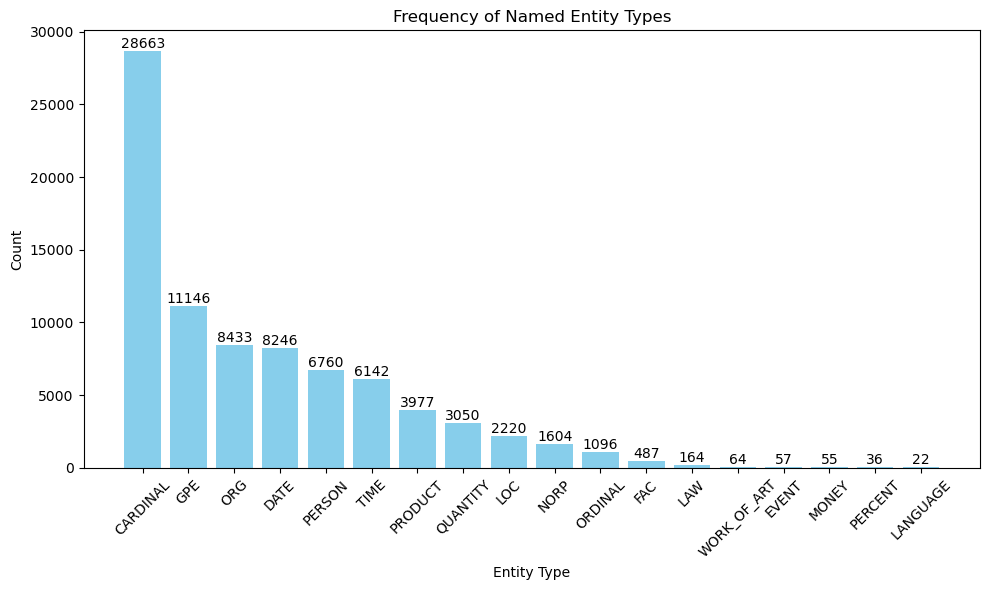

In [24]:
# Named Entity Recognition (NER)
nlp = spacy.load('en_core_web_sm')

def extract_entities(comment):
    if pd.isna(comment):  # Handle missing comments
        return []
    doc = nlp(comment)
    return [(entity.text, entity.label_) for entity in doc.ents]

df['entities'] = comments.apply(extract_entities)

# Ensure no NaN or None in 'entities' column
df['entities'] = df['entities'].apply(lambda x: x if isinstance(x, list) else [])

# Count the frequency of each entity label
entity_labels = [label for entities in df['entities'] for _, label in entities]
entity_counts = pd.Series(entity_labels).value_counts()

# Plot the entity frequency distribution
plt.figure(figsize=(10, 6))
bars = plt.bar(entity_counts.index, entity_counts, color='skyblue')

# Add data labels to the bars
for bar, count in zip(bars, entity_counts):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, str(count), 
             ha='center', va='bottom', fontsize=10, color='black')

# Customize the plot
plt.title('Frequency of Named Entity Types')
plt.xlabel('Entity Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()

# Scatter Plot of Clusters

This script generates a scatter plot where each point represents a comment, and different colors indicate different clusters. The key steps include:

- **Install necessary packages**: Ensure all required libraries are installed.
- **Load required libraries**: Import libraries for plotting and dimensionality reduction.
- **t-SNE**: Reduce high-dimensional data to 2D.
- **Create a DataFrame**: Store t-SNE results and cluster labels.
- **Plot**: Use Seaborn to create the scatter plot of clusters.


In [43]:

# Clustering Comments
tfidf_vectorizer = TfidfVectorizer(stop_words='english')
comments_tfidf = tfidf_vectorizer.fit_transform(comments)
kmeans = KMeans(n_clusters=5, random_state=0)
df['cluster'] = kmeans.fit_predict(comments_tfidf)
print(df[['comments', 'cluster']].head())

# Extract comments by cluster
clustered_comments = df.groupby('cluster')['comments'].apply(' '.join)

print(f"Cluster Vectorized")

# Initialize a vectorizer to compute term frequencies
vectorizer = CountVectorizer(stop_words='english')

# Compute term frequencies for each cluster
cluster_term_freq = vectorizer.fit_transform(clustered_comments)

# Get feature names (terms)
terms = vectorizer.get_feature_names_out()

# Create a DataFrame for term frequencies
term_freq_df = pd.DataFrame(cluster_term_freq.toarray(), index=clustered_comments.index, columns=terms)

# Identify top terms for each cluster
top_terms_per_cluster = term_freq_df.apply(lambda x: x.nlargest(10).index.tolist(), axis=1)

# Display top terms for each cluster
for cluster, top_terms in top_terms_per_cluster.items():
    print(f"Cluster {cluster}: {', '.join(top_terms)}")



                                            comments  cluster
0  This event took place in early fall around 194...        2
1  1949 Lackland AFB&#44 TX.  Lights racing acros...        2
2  Green/Orange circular disc over Chester&#44 En...        3
3  My older brother and twin sister were leaving ...        2
4  AS a Marine 1st Lt. flying an FJ4B fighter/att...        2
Cluster Vectorized
Cluster 0: 33, 44, sky, lights, light, object, ufo, bright, saw, seen
Cluster 1: 44, lights, object, sky, bright, light, white, moving, red, shaped
Cluster 2: lights, object, 44, sky, shaped, ufo, saw, craft, moving, seen
Cluster 3: orange, lights, sky, 44, bright, light, red, moving, object, glowing
Cluster 4: light, bright, sky, 44, white, moving, red, lights, blue, object


In [55]:
""" Data cleanup to handle potential errors before vectorizing. Shows data cleaning operations and their impact on errors. """

# Data Check for missing values
missing_values = df['comments'].isnull().sum()
print(f'Missing values in comments: {missing_values}')

# Drop rows with missing comments
df = df.dropna(subset=['comments'])

# Extract and clean comments
comments = df['comments']
comments = comments.apply(lambda x: x.lower().strip())

# Check the lengths
print(f'Length of comments: {len(comments)}')
print(f'Length of DataFrame: {len(df)}')

# Vectorize the comments
tfidf_vectorizer = TfidfVectorizer(stop_words='english')
comments_tfidf = tfidf_vectorizer.fit_transform(comments)

# Fit the KMeans model
kmeans = KMeans(n_clusters=5, random_state=0)
df['cluster'] = kmeans.fit_predict(comments_tfidf)

# Check the final lengths
print(f'Length of comments after cleaning: {len(comments)}')
print(f'Length of DataFrame after cleaning: {len(df)}')
print(f'Shape of TF-IDF matrix: {comments_tfidf.shape}')

print(df[['comments', 'cluster']].head())

Missing values in comments: 0
Length of comments: 84024
Length of DataFrame: 84024
Length of comments after cleaning: 84024
Length of DataFrame after cleaning: 84024
Shape of TF-IDF matrix: (84024, 31035)
                                            comments  cluster
0  This event took place in early fall around 194...        2
1  1949 Lackland AFB&#44 TX.  Lights racing acros...        2
2  Green/Orange circular disc over Chester&#44 En...        3
3  My older brother and twin sister were leaving ...        2
4  AS a Marine 1st Lt. flying an FJ4B fighter/att...        2


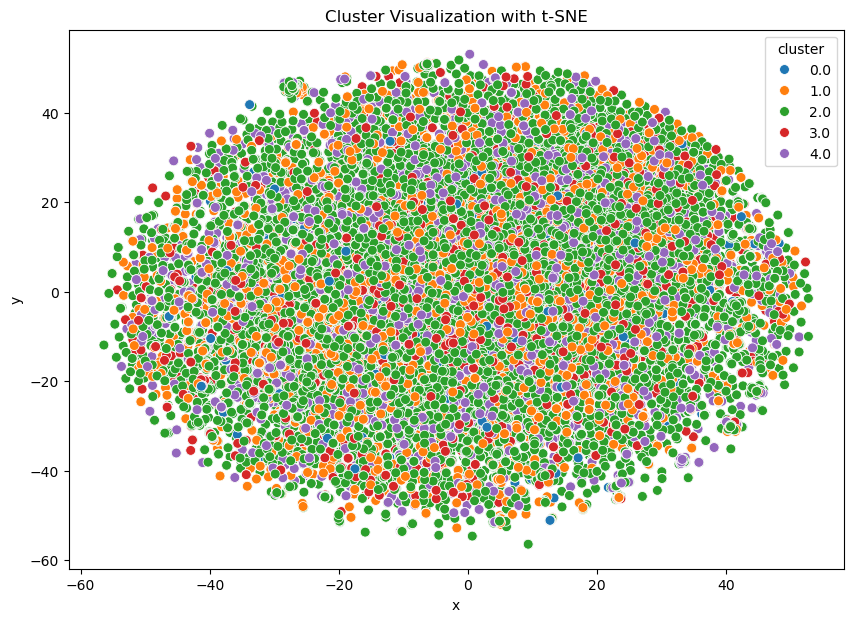

In [34]:
# Load required libraries
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.manifold import TSNE

# Perform t-SNE to reduce dimensionality
tsne = TSNE(n_components=2, random_state=0)
comments_tsne = tsne.fit_transform(comments_tfidf.toarray())

# Create a DataFrame for the t-SNE results
tsne_df = pd.DataFrame(comments_tsne, columns=['x', 'y'])
tsne_df['cluster'] = df['cluster']

# Plot the clusters
plt.figure(figsize=(10, 7))
sns.scatterplot(data=tsne_df, x='x', y='y', hue='cluster', palette='tab10', s=50)
plt.title('Cluster Visualization with t-SNE')
plt.show()

# Simplified Cluster Descriptions

1. **Cluster 0 (Blue)**:
   - **Top Terms**: 33, 44, sky, lights, light, object, ufo, bright, saw, seen
   - **Meaning**: Unique comments with specific terminology related to UFO sightings.

2. **Cluster 1 (Orange)**:
   - **Top Terms**: 44, lights, object, sky, bright, light, white, moving, red, shaped
   - **Meaning**: Side paths offering different perspectives on sightings.

3. **Cluster 2 (Green)**:
   - **Top Terms**: lights, object, 44, sky, shaped, ufo, saw, craft, moving, seen
   - **Meaning**: Most common themes, representing prevalent patterns in observations.

4. **Cluster 3 (Red)**:
   - **Top Terms**: orange, lights, sky, 44, bright, light, red, moving, object, glowing
   - **Meaning**: Mix of central and side path characteristics, with frequent mentions of bright and glowing objects.

5. **Cluster 4 (Purple)**:
   - **Top Terms**: light, bright, sky, 44, white, moving, red, lights, blue, object
   - **Meaning**: Central themes forming the main paths of the dataset.


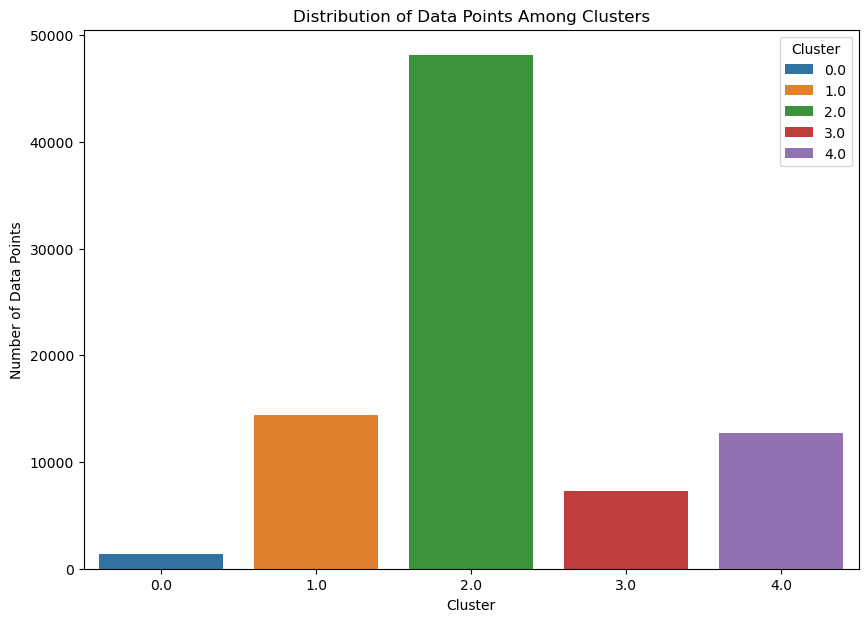

In [54]:
# Count the number of data points in each cluster
cluster_counts = tsne_df['cluster'].value_counts().reset_index()
cluster_counts.columns = ['cluster', 'count']

# Create a bar plot
plt.figure(figsize=(10, 7))
sns.barplot(data=cluster_counts, x='cluster', y='count', hue='cluster', dodge=False, palette='tab10')
plt.xlabel('Cluster')
plt.ylabel('Number of Data Points')
plt.title('Distribution of Data Points Among Clusters')
plt.legend(title='Cluster', loc='upper right')
plt.show()

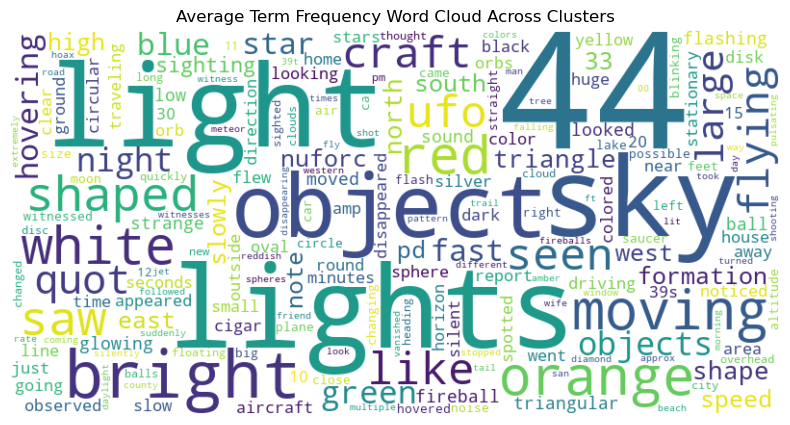

In [53]:
# Load required libraries
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Calculate term frequencies for each cluster
clustered_comments = df.groupby('cluster')['comments'].apply(' '.join)
vectorizer = CountVectorizer(stop_words='english')
term_freq_matrix = vectorizer.fit_transform(clustered_comments)
terms = vectorizer.get_feature_names_out()

# Create a DataFrame for term frequencies
term_freq_df = pd.DataFrame(term_freq_matrix.toarray(), index=clustered_comments.index, columns=terms)

# Calculate average term frequencies across clusters
average_term_freq = term_freq_df.mean(axis=0)

# Generate word cloud from average term frequencies
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(average_term_freq)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Average Term Frequency Word Cloud Across Clusters')
plt.show()
